In [2]:
import cv2
import numpy as np 
import matplotlib.pyplot as plt

In [3]:
img = cv2.imread("../resources/t.png")
imgResize = cv2.resize(img, (512, 512))

img = cv2.cvtColor(imgResize, cv2.COLOR_BGR2GRAY)

In [4]:
print(img.shape)

(512, 512)


In [5]:
#plt.imshow(img,cmap="gray")


In [6]:

def histogram_generate(image):
    histogram = np.zeros(256)
    height,width = image.shape
    for r in range(height):
        for c in range(width):
            histogram[image[r,c]] +=1
    return histogram

In [7]:
print(img.shape)

(512, 512)


Text(0.5, 1.0, 'Original Image')

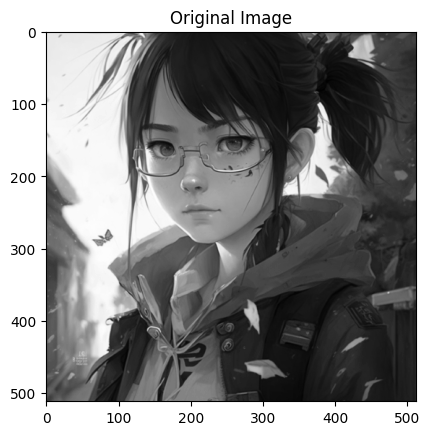

In [8]:
plt.imshow(img,cmap="gray")
plt.title("Original Image")

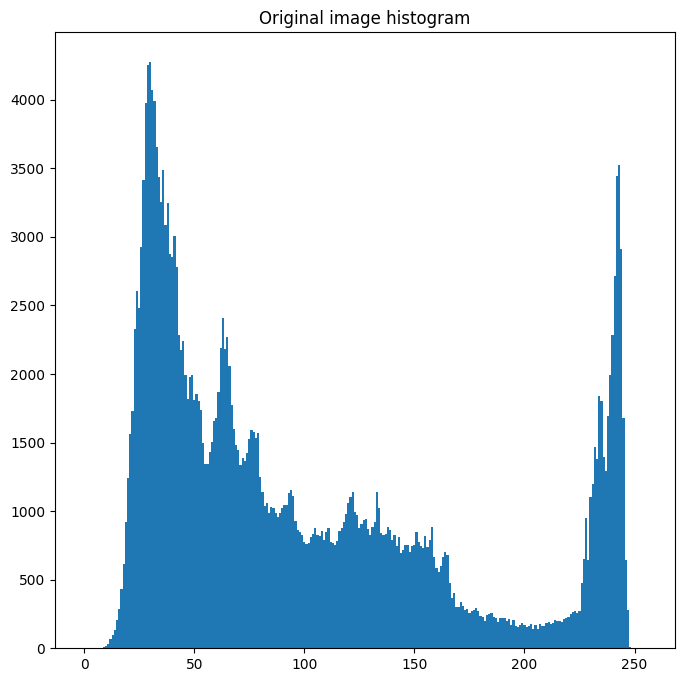

In [9]:
plt.figure(figsize=(8,8))

img_count = histogram_generate(img)

plt.title("Original image histogram")
plt.bar(range(256),img_count,width=1.0)
plt.show()

In [10]:
#Observing 

thrshold = 150
segmxented_gray_img = np.where(img >= thrshold, 255, 0)
segmxented_gray_img = np.uint8(segmxented_gray_img)



In [11]:
segmxented_gray_img

array([[255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       [255, 255, 255, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

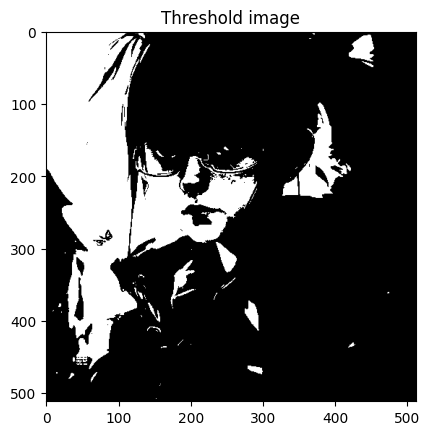

In [12]:

plt.title("Threshold image")
plt.imshow(segmxented_gray_img,cmap="gray")



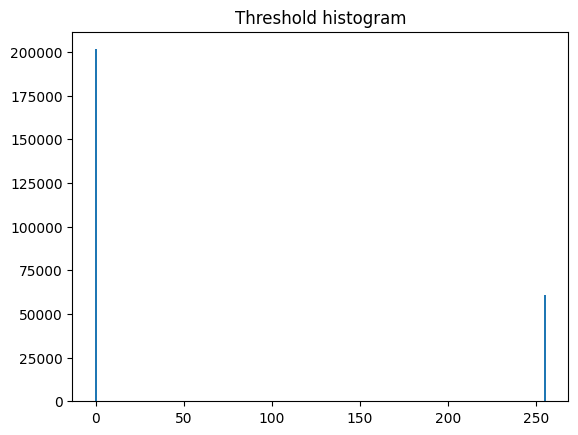

In [13]:

plt.title("Threshold histogram")
segmxented_gray_img_c = histogram_generate(segmxented_gray_img)


plt.bar(range(256),segmxented_gray_img_c,width=1.0)
plt.show()



Making thershold with Global thresholding method:

In [14]:
threshold_point = np.sum(img_count) // 2 #round the number divising it by 2
threshold_intensity = 0

while True:
    if (threshold_point <= 0):
        break
    threshold_point -= img_count[threshold_intensity]
    threshold_intensity += 1

In [15]:
threshold_intensity

76

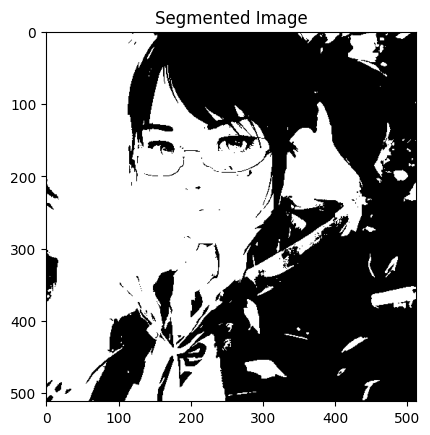

In [16]:
segmented_image = np.where(img > threshold_intensity, 255, 0)
segmented_image = np.uint8(segmented_image)
plt.imshow(cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB))
plt.title("Segmented Image")
plt.show()

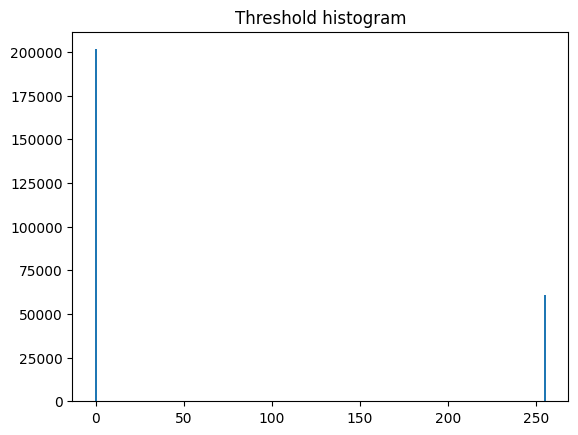

In [19]:

plt.title("Threshold histogram")
segmented_image_histogram = histogram_generate(segmxented_gray_img)


plt.bar(range(256),segmented_image_histogram,width=1.0)
plt.show()

